In [32]:
# Our example concerns a big company that wants to 
# understand why some of their best and most experienced employees are leaving prematurely. 
# The company also wishes to predict which valuable employees will leave next.

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

In [38]:
#read data from csv
hr = pd.read_csv("Hr_comma_sep.csv")
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
hr.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14989,0.43,0.57,2,159,3,1,1,0,technical,low
14990,0.89,0.88,5,228,5,1,1,0,support,low
14991,0.09,0.81,6,257,4,0,1,0,support,low
14992,0.40,0.48,2,155,3,0,1,0,support,low
14993,0.76,0.83,6,293,6,0,1,0,support,low
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
# check unique values
hr.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# check null values
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

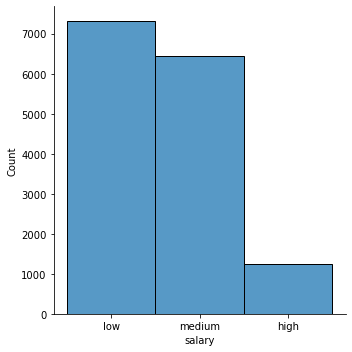

In [7]:
sns.displot(data=hr, x='salary')

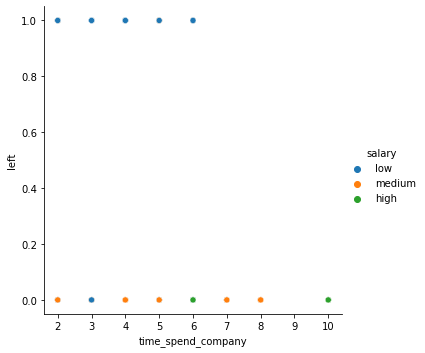

In [8]:
sns.relplot(data=hr, x="time_spend_company", y="left", hue="salary") 
#note - lower salary individuals left more than other groups

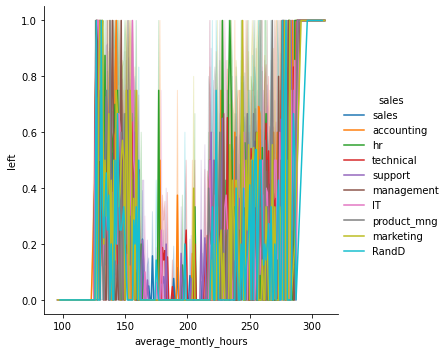

In [9]:
sns.relplot(data=hr, x="average_montly_hours", y="left", hue="sales", kind="line") 

In [39]:
hr.rename(columns = {'sales':'depart'}, inplace=True)
#change the sales column to department

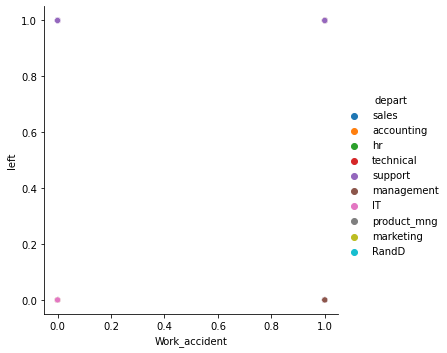

In [12]:
sns.relplot(data=hr, x="Work_accident", y="left", hue="depart")

array([[<AxesSubplot:title={'center':'IT'}>,
        <AxesSubplot:title={'center':'RandD'}>,
        <AxesSubplot:title={'center':'accounting'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'management'}>,
        <AxesSubplot:title={'center':'marketing'}>],
       [<AxesSubplot:title={'center':'product_mng'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'support'}>],
       [<AxesSubplot:title={'center':'technical'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

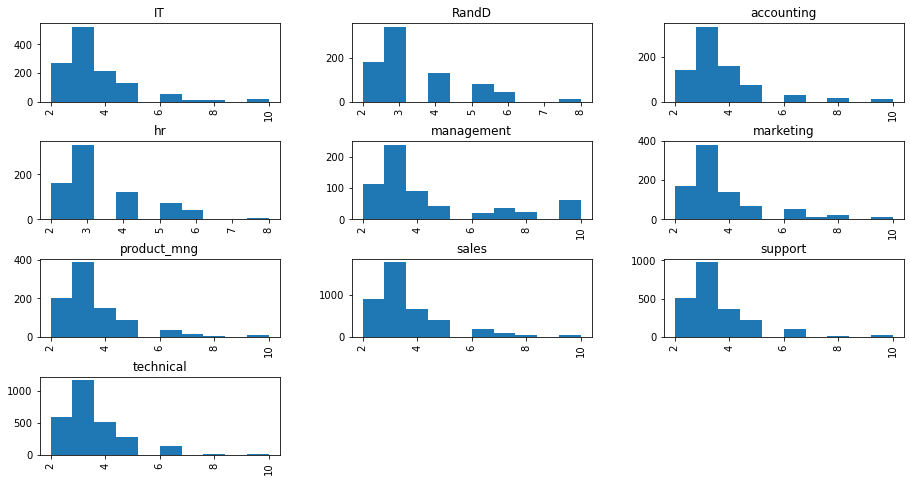

In [14]:
hr['time_spend_company'].hist(by=hr['depart'], figsize=(15,8)) #check the time spend by the employees in each department

In [40]:
#convert the salary data to numerical values
d = {"low": 0,"medium":1, "high":2}
hr['salary'] = hr['salary'].map(d)

In [41]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depart,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [42]:
hr.corr() #check the correlation between the variables with numerical values

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


<AxesSubplot:>

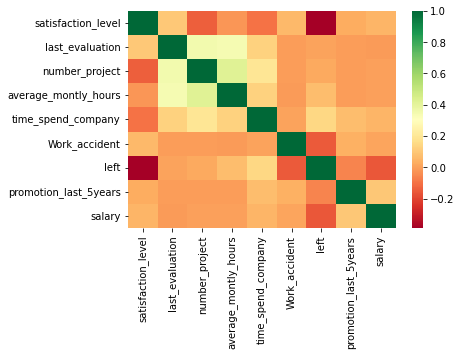

In [43]:
sns.heatmap(data = hr.corr(), cmap="RdYlGn") #visualizing the correlation of data 

# build a model for predicting which valuable employees that will leave

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

model.fit(hr[['satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years','time_spend_company']], hr['left'])

LinearRegression()

In [23]:
model.coef_

array([-6.29909639e-01,  4.17295354e-04, -1.58201412e-01, -1.59943604e-01,
        3.07489904e-02])

In [24]:
model.intercept_

0.45892691424422344

In [25]:
# hr['salary'].mask(hr['salary'] == 'low',1, inplace=True) #change the values salary to categorical data
# hr['salary'].mask(hr['salary'] == 'medium',2, inplace=True)
# hr['salary'].mask(hr['salary'] == 'high',3, inplace=True)

In [26]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depart,salary
14994,0.40,0.57,2,151,3,0,1,0,support,0
14995,0.37,0.48,2,160,3,0,1,0,support,0
14996,0.37,0.53,2,143,3,0,1,0,support,0
14997,0.11,0.96,6,280,4,0,1,0,support,0
14998,0.37,0.52,2,158,3,0,1,0,support,0


In [27]:
model.predict([[0.80,280,0,0,6]]) #very weak relationship between the independent variables and the dependent variable

array([0.25633584])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
md2 = LogisticRegression()
X = hr.drop(columns=['depart','left'])
y= hr['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
md2.fit(X_train, y_train)

md2.predict([[0.10,0.96,2,250,4,0,3,1]])

C:\Users\The Oyondi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0], dtype=int64)

In [30]:
md2.score(X_test, y_test)

0.7943434343434344

The model has 79% accuracy.
Through testing of the model, the following were the notable findings:
    1 - reducing satisfaction level and increasing the salary will make employees stay
    2 - reducing both salary and employees satisfaction level will make them leave
    3 - promoting the employees with lower satisfaction level and salary still could maintain employees
    4 - low satisfaction level with low salary and no promotion 
    while the employee stays for long in a company will result in employees leaving

# using classification to identify which department is likely to have more employees left due to various factors


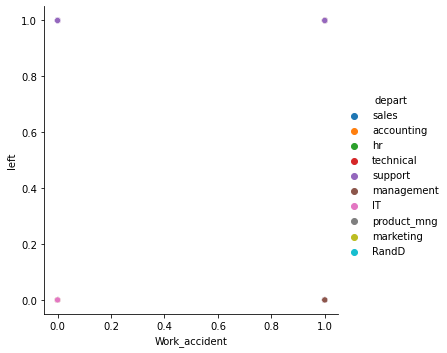

In [45]:
sns.relplot(data=hr, x="Work_accident", y="left", hue="depart")

In [46]:
# converting the departments to numerical values
dp = {'sales':1,'accounting':2,'hr':3,'technical':4,'support':5,
      'management':6,'IT':7,'product_mng':8,'marketing':9, 'RandD':10}

hr['depart'] = hr['depart'].map(dp)

In [50]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depart,salary
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,1
2,0.11,0.88,7,272,4,0,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


In [52]:
X = hr.drop(columns=['left'])
y= hr['left']

In [53]:
dtree_mod = DecisionTreeClassifier()
dtree_mod.fit(X,y)

DecisionTreeClassifier()

In [58]:
import pydotplus
import matplotlib.image as pltimg

In [129]:
features = ['satisfaction_level','average_montly_hours','last_evaluation','number_project','salary','Work_accident','promotion_last_5years','time_spend_company','depart']
data = tree.export_graphviz(dtree_mod, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

InvocationException: GraphViz's executables not found

In [107]:
hr[(hr["left"] == 0)] #finding rows where employees have not left.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,depart,salary
2000,0.58,0.74,4,215,3,0,0,0,1,0
2001,0.82,0.67,2,202,3,0,0,0,1,0
2002,0.45,0.69,5,193,3,0,0,0,1,0
2003,0.78,0.82,5,247,3,0,0,0,1,0
2004,0.49,0.60,3,214,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,6,2
14207,0.74,0.95,5,266,10,0,0,1,6,2
14208,0.85,0.54,3,185,10,0,0,1,6,2
14209,0.33,0.65,3,172,10,0,0,1,9,2


In [127]:
dtree_mod.predict([[0.10,0.74,4,215,3,0,2,4,0]]) #testing the model with various input values.

array([1], dtype=int64)

In [109]:
dtree_mod.score(X, y)

1.0